In [1]:
import librosa
import numpy as np
import os

# This is the folder path (NOT an individual file)
folder_path = r"C:\Users\Madan Prasad\ML_Emotion_Recognition\data"

# Function to extract MFCCs from a single audio file
def extract_mfcc(audio_file_path):
    y, sr = librosa.load(audio_file_path, duration=3, offset=0.5)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    return np.mean(mfcc.T, axis=0)



In [2]:
import os

X = []
y = []

emotions = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

data_path = r"C:\Users\Madan Prasad\ML_Emotion_Recognition\data"

for file in os.listdir(data_path):
    if file.endswith(".wav"):
        emotion_code = file.split("-")[2]
        emotion = emotions[emotion_code]
        full_path = os.path.join(data_path, file)
        features = extract_mfcc(full_path)
        X.append(features)
        y.append(emotion)


C:\Users\Madan Prasad\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\Madan Prasad\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\Madan Prasad\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Convert labels to numbers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    np.array(X), np.array(y_encoded), test_size=0.2, random_state=42)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(256, input_shape=(40,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='softmax'))  # 8 emotions

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


C:\Users\Madan Prasad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,424 (173.53 KB)

 Trainable params: 44,424 (173.53 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1348 - loss: 38.8035 - val_accuracy: 0.1215 - val_loss: 3.8609
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1187 - loss: 8.9690 - val_accuracy: 0.1285 - val_loss: 2.0777
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1495 - loss: 2.5177 - val_accuracy: 0.1285 - val_loss: 2.0762
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1265 - loss: 2.3577 - val_accuracy: 0.1285 - val_loss: 2.0750
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1257 - loss: 2.1919 - val_accuracy: 0.1285 - val_loss: 2.0737
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1142 - loss: 2.1203 - val_accuracy: 0.1285 - val_loss: 2.0725
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1009 - loss: 2.1121 - val_accuracy: 0.1285 - val_loss: 2.0715
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1283 - loss: 2.1145 - val_accuracy: 0.1285 - val_loss

In [6]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {acc*100:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1298 - loss: 2.0683 
Test accuracy: 12.15%


In [7]:
file_path = r"C:\Users\Madan Prasad\ML_Emotion_Recognition\data\03-01-01-01-01-01-01.wav"
mfcc = extract_mfcc(file_path).reshape(1, -1)
prediction = model.predict(mfcc)
predicted_class = encoder.inverse_transform([np.argmax(prediction)])
print("Predicted emotion:", predicted_class[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted emotion: disgust


In [8]:
model.save("emotion_model.h5")

# To load later:
# from tensorflow.keras.models import load_model
# model = load_model("emotion_model.h5")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00        37
        calm       0.00      0.00      0.00        35
     disgust       0.12      1.00      0.22        35
     fearful       0.00      0.00      0.00        43
       happy       0.00      0.00      0.00        37
     neutral       0.00      0.00      0.00        19
         sad       0.00      0.00      0.00        44
   surprised       0.00      0.00      0.00        38

    accuracy                           0.12       288
   macro avg       0.02      0.12      0.03       288
weighted avg       0.01      0.12      0.03       288



C:\Users\Madan Prasad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Madan Prasad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Madan Prasad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


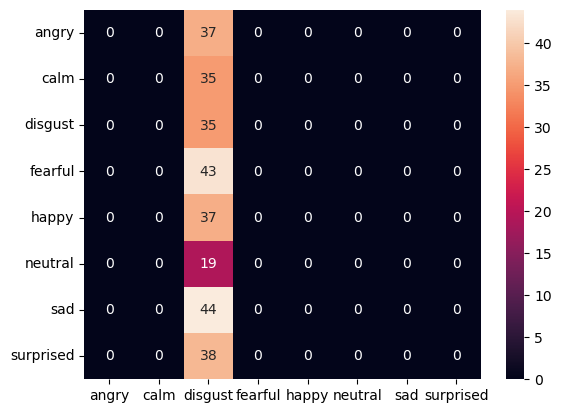

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_labels, target_names=encoder.classes_))

cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.show()


In [10]:
import collections
print(collections.Counter(y))


Counter({'calm': 192, 'happy': 192, 'sad': 192, 'angry': 192, 'fearful': 192, 'disgust': 192, 'surprised': 192, 'neutral': 96})


In [11]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, duration=3, offset=0.5)
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    rms = librosa.feature.rms(y=y)
    
    features = np.hstack([
        np.mean(mfcc.T, axis=0),
        np.mean(chroma.T, axis=0),
        np.mean(spec_contrast.T, axis=0),
        np.mean(tonnetz.T, axis=0),
        np.mean(zcr.T, axis=0),
        np.mean(rms.T, axis=0)
    ])
    
    return features


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(8, activation='softmax')
])


C:\Users\Madan Prasad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5)

history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop, reduce_lr])


Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1747 - loss: 2.0604 - val_accuracy: 0.2604 - val_loss: 1.8484 - learning_rate: 0.0010
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2579 - loss: 1.8706 - val_accuracy: 0.3160 - val_loss: 1.7253 - learning_rate: 0.0010
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3421 - loss: 1.7740 - val_accuracy: 0.3924 - val_loss: 1.6257 - learning_rate: 0.0010
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3889 - loss: 1.6336 - val_accuracy: 0.4167 - val_loss: 1.5333 - learning_rate: 0.0010
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4386 - loss: 1.5530 - val_accuracy: 0.4514 - val_loss: 1.4579 - learning_rate: 0.0010
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4431 - loss: 1.4630 - val_accuracy: 0.4792 - val_loss: 1.3834 - learning_rate: 0.0010
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4589 - loss: 1.4048 - val_acc

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7103 - loss: 0.7392 
Test accuracy: 71.18%


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
              precision    recall  f1-score   support

       angry       0.79      0.82      0.81        38
        calm       0.67      0.89      0.76        38
     disgust       0.72      0.55      0.63        38
     fearful       0.81      0.77      0.79        39
       happy       0.75      0.62      0.68        39
     neutral       0.54      0.37      0.44        19
         sad       0.62      0.68      0.65        38
   surprised       0.71      0.82      0.76        39

    accuracy                           0.71       288
   macro avg       0.70      0.69      0.69       288
weighted avg       0.71      0.71      0.71       288



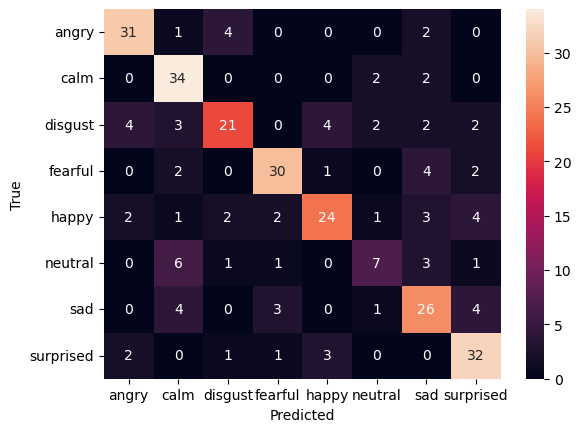

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_labels, target_names=encoder.classes_))

cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),     # ⬅️ Added one more layer
    Dropout(0.2),
    Dense(8, activation='softmax')
])


C:\Users\Madan Prasad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
from tensorflow.keras.optimizers import AdamW

optimizer = AdamW(learning_rate=0.001, weight_decay=1e-5)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [20]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, label_smoothing=0.1),
    optimizer=optimizer,
    metrics=['accuracy']
)


NameError: name 'tf' is not defined

In [21]:
model.fit(..., batch_size=64, ...)


SyntaxError: positional argument follows keyword argument (3384286994.py, line 1)

In [22]:
def add_noise(data, noise_level=0.005):
    return data + noise_level * np.random.randn(len(data))


In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5)

history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop, reduce_lr])


Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1663 - loss: 2.1101 - val_accuracy: 0.2361 - val_loss: 1.9561 - learning_rate: 0.0010
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2330 - loss: 1.9747 - val_accuracy: 0.2639 - val_loss: 1.8624 - learning_rate: 0.0010
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2697 - loss: 1.8896 - val_accuracy: 0.3229 - val_loss: 1.7612 - learning_rate: 0.0010
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3101 - loss: 1.8150 - val_accuracy: 0.3611 - val_loss: 1.6607 - learning_rate: 0.0010
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3511 - loss: 1.6754 - val_accuracy: 0.4236 - val_loss: 1.5792 - learning_rate: 0.0010
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3745 - loss: 1.6351 - val_accuracy: 0.4444 - val_loss: 1.5139 - learning_rate: 0.0010
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3678 - loss: 1.6184 - val_acc

In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7131 - loss: 0.7860 
Test accuracy: 72.22%


In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True  # ⬅️ important
)


In [26]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, duration=3, offset=0.5)

    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfcc_delta = librosa.feature.delta(mfcc)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)

    features = np.hstack([
        np.mean(mfcc.T, axis=0),
        np.mean(mfcc_delta.T, axis=0),
        np.mean(chroma.T, axis=0),
        np.mean(spectral_rolloff.T, axis=0),
        np.mean(bandwidth.T, axis=0)
    ])
    return features


In [27]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0007)  # try a slightly smaller lr
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [28]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


In [29]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.6),     # increase
    Dense(256, activation='relu'),
    Dropout(0.5),     # increase
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(8, activation='softmax')
])


In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5)

history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop, reduce_lr])


Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1309 - loss: 2.2394 - val_accuracy: 0.2361 - val_loss: 2.0167 - learning_rate: 0.0010
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1629 - loss: 2.0551 - val_accuracy: 0.2361 - val_loss: 1.9526 - learning_rate: 0.0010
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2428 - loss: 1.9624 - val_accuracy: 0.2292 - val_loss: 1.9027 - learning_rate: 0.0010
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2128 - loss: 1.9434 - val_accuracy: 0.2500 - val_loss: 1.8523 - learning_rate: 0.0010
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2261 - loss: 1.9001 - val_accuracy: 0.2847 - val_loss: 1.8146 - learning_rate: 0.0010
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3286 - loss: 1.8353 - val_accuracy: 0.3160 - val_loss: 1.7778 - learning_rate: 0.0010
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3284 - loss: 1.7654 - val_acc

In [31]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7061 - loss: 0.8029 
Test accuracy: 70.14%


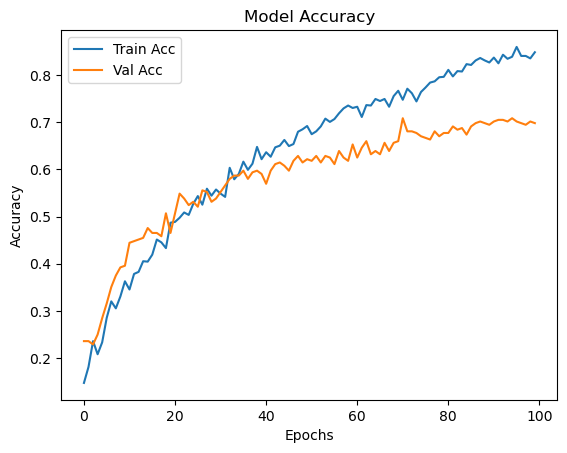

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


In [33]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [34]:
from keras.layers import BatchNormalization

model = Sequential([
    Dense(512, activation='relu', input_shape=(input_shape,)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(num_classes, activation='softmax')
])


NameError: name 'input_shape' is not defined

In [35]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, duration=3, offset=0.5)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    delta = librosa.feature.delta(mfcc)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    
    combined = np.vstack([mfcc, delta, chroma])
    return np.mean(combined.T, axis=0)


In [36]:
file_path = r"C:\Users\Madan Prasad\ML_Emotion_Recognition\data\03-01-01-01-01-01-01.wav"
mfcc = extract_mfcc(file_path).reshape(1, -1)
prediction = model.predict(mfcc)
predicted_class = encoder.inverse_transform([np.argmax(prediction)])
print("Predicted emotion:", predicted_class[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Predicted emotion: sad
